# Data Analysis: LeNet-5 x FashionMNIST

*Version History*

* **4.0** - Analyze results of grid search (*batch size* x *learning rate*)
* **4.1** - Modify figures, check overfitting and analyze results of second grid search (*momentum* x *weight decay*)
* **4.2** - Analyze results of data augmentation experiments (*horizontal flipping* & *random cropping*)
* **4.3** - Analyze results of grid search addressing *LR schedule*
* **4.4** - Analyze results of control experiments of *random cropping* grid search


## Imports

In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D
from PIL import Image
from pyfonts import load_font
from torchvision.transforms.v2 import Pad

from src.utils.data import *
from src.visualization.color import get_color
from src.visualization.datasets import *
from src.visualization.saving import save_figure, save_image

## Grid Search: Batch Size x Learning Rate


### Analyze Training Results

In [2]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/grid_search/batch_size_lr/2024-09-03_22-52-15"
b_lr = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
b_lr = b_lr.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Display overall results
b_lr

,b,lr,Epochs,Loss,Acc@1,Acc@5
0,8,0.001,12,0.288,0.896,0.999
1,8,0.010,8,0.371,0.871,0.998
2,8,0.100,4,2.315,0.100,0.500
3,16,0.001,16,0.293,0.895,0.998
4,16,0.010,4,0.328,0.878,0.998
5,16,0.100,2,2.308,0.100,0.500
6,32,0.001,30,0.298,0.896,0.998
7,32,0.010,12,0.306,0.894,0.999
8,32,0.100,15,0.875,0.665,0.987
9,64,0.001,26,0.317,0.884,0.998


In [3]:
# Group results by learning rate
grouped_by_lr = b_lr.groupby("lr")
col_order = ["b", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by learning rate
for lr, group in grouped_by_lr:
    print(f"\033[1mLEARNING RATE: {lr}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

LEARNING RATE: 0.001
   b  Acc@1  Loss  Epochs
   8  0.896 0.288      12
  16  0.895 0.293      16
  32  0.896 0.298      30
  64  0.884 0.317      26
 128  0.881 0.328      40
 256  0.877 0.339      64
 512  0.862 0.390      67
1024  0.848 0.429     100
2048  0.795 0.564      99
4096  0.737 0.694      98


LEARNING RATE: 0.01
   b  Acc@1  Loss  Epochs
   8  0.871 0.371       8
  16  0.878 0.328       4
  32  0.894 0.306      12
  64  0.896 0.292      10
 128  0.892 0.303      13
 256  0.890 0.304      17
 512  0.895 0.298      35
1024  0.887 0.314      46
2048  0.871 0.355      44
4096  0.874 0.349      92


LEARNING RATE: 0.1
   b  Acc@1  Loss  Epochs
   8  0.100 2.315       4
  16  0.100 2.308       2
  32  0.665 0.875      15
  64  0.851 0.432      13
 128  0.876 0.342      10
 256  0.879 0.332      17
 512  0.888 0.319      17
1024  0.883 0.321      21
2048  0.880 0.339      38
4096  0.541 1.366       1




In [4]:
# Group results by batch size
grouped_by_b = b_lr.groupby("b")
col_order = ["lr", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by batch size
for b, group in grouped_by_b:
    print(f"\033[1mBATCH SIZE: {b}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

BATCH SIZE: 8
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.288      12
0.010  0.871 0.371       8
0.100  0.100 2.315       4


BATCH SIZE: 16
   lr  Acc@1  Loss  Epochs
0.001  0.895 0.293      16
0.010  0.878 0.328       4
0.100  0.100 2.308       2


BATCH SIZE: 32
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.298      30
0.010  0.894 0.306      12
0.100  0.665 0.875      15


BATCH SIZE: 64
   lr  Acc@1  Loss  Epochs
0.001  0.884 0.317      26
0.010  0.896 0.292      10
0.100  0.851 0.432      13


BATCH SIZE: 128
   lr  Acc@1  Loss  Epochs
0.001  0.881 0.328      40
0.010  0.892 0.303      13
0.100  0.876 0.342      10


BATCH SIZE: 256
   lr  Acc@1  Loss  Epochs
0.001  0.877 0.339      64
0.010  0.890 0.304      17
0.100  0.879 0.332      17


BATCH SIZE: 512
   lr  Acc@1  Loss  Epochs
0.001  0.862 0.390      67
0.010  0.895 0.298      35
0.100  0.888 0.319      17


BATCH SIZE: 1024
   lr  Acc@1  Loss  Epochs
0.001  0.848 0.429     100
0.010  0.887 0.314      46
0.100  0.883 0.321      2

### Analyze Training Durations

In [5]:
# Load and parse training durations (seconds per epoch for each individual epoch)
training_durations = parse_log_dir(log_dir, get_training_durations)

# Compute mean and standard error per batch size
duration_stats = training_durations.groupby("b")["duration"].agg(["mean", "sem"]).reset_index()

# Find best learning rate per batch size (in terms of loss) and corresponding number of epochs trained for
best_lr = b_lr.loc[b_lr.groupby("b")["Loss"].idxmin(), ["b", "lr", "Epochs"]]
duration_stats = pd.merge(duration_stats, best_lr, on="b")
duration_stats = duration_stats.rename(columns={
    "mean": "Mean",
    "sem": "SEM",
    "lr": "Best lr"
})

# Display results
duration_stats

,b,Mean,SEM,Best lr,Epochs
0,8,56.019923,0.192281,0.001,12
1,16,32.885595,0.246686,0.001,16
2,32,17.939264,0.018054,0.001,30
3,64,11.052156,0.010747,0.010,10
4,128,8.205487,0.006392,0.010,13
5,256,6.649885,0.003555,0.010,17
6,512,5.963813,0.003601,0.010,35
7,1024,5.446548,0.002352,0.010,46
8,2048,5.192625,0.002385,0.100,38
9,4096,4.960276,0.001986,0.010,92


### Visualize Training Durations

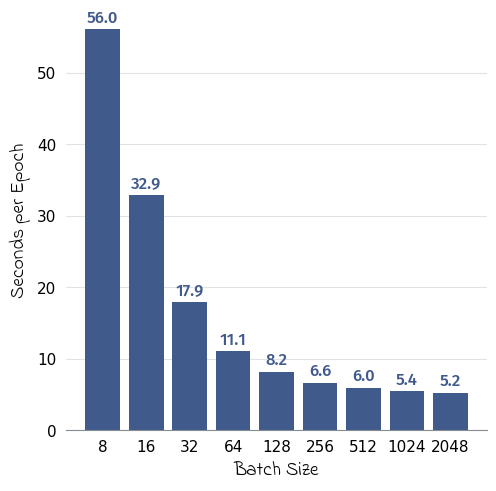

In [6]:
# Exclude batch size of 4096 from results
filtered_duration_stats = duration_stats[duration_stats["b"] != 4096]

# Load custom font
label_font = load_font(
   font_url="https://github.com/google/fonts/blob/main/ofl/indieflower/IndieFlower-Regular.ttf?raw=true"
)

# Initialize plot
fig_secs_per_epoch, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Remove left, top, and right spines (figure borders)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Change color of bottom spine
ax.spines["bottom"].set_color(get_color("anthracite", tint=0.4))

# Add grid
ax.xaxis.grid(False)
ax.yaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Mean"],
    color=get_color("tory-blue"),
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 1,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      weight="roman",
      size=12
  )

# Add axis labels
ax.set_xlabel("Batch Size", font=label_font, size=14)
ax.set_ylabel("Seconds per Epoch", font=label_font, size=14)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

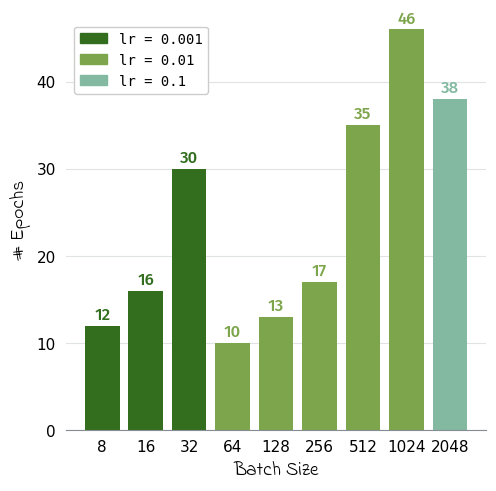

In [7]:
# Initialize plot
fig_num_epochs, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Remove left, top, and right spines (figure borders)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Change color of bottom spine
ax.spines["bottom"].set_color(get_color("anthracite", tint=0.4))

# Add grid
ax.xaxis.grid(False)
ax.yaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Create color map to distinguish runs corresponding to different lr
lr_to_color_map = {
    0.001: get_color("bilbao"),
    0.01: get_color("chelsea-cucumber"),
    0.1: get_color("padua")
}

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Epochs"],
    color=[lr_to_color_map[lr] for lr in filtered_duration_stats["Best lr"]],
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.75,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      weight="roman",
      size=12
  )

# Add legend
font_properties = FontProperties(family="monospace")
handles = [plt.Rectangle((0, 0), 1, 1, color=lr_to_color_map[lr]) for lr in lr_to_color_map]
labels = [f"lr = {lr}" for lr in lr_to_color_map]
legend = ax.legend(handles, labels, prop=font_properties, loc=(0.02, 0.8))
legend.get_frame().set_alpha(1)

# Add axis labels
ax.set_xlabel("Batch Size", font=label_font, size=14)
ax.set_ylabel("# Epochs", font=label_font, size=14)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

## Overfitting

In [8]:
# Load training details from TensorBoard event files
log_dir = "../out/lenet_fashionmnist/grid_search/overfitting/2024-09-04_22-25-21"
overfitting = parse_tb_data(log_dir)

# Discard Acc@1 and Acc@5
overfitting = overfitting[overfitting["metric"] == "Loss"]
overfitting = overfitting.sort_values(by=["b", "wd", "run_id", "mode", "metric", "step"], ascending=True)
overfitting.reset_index(drop=True, inplace=True)

# Convert "step" column: # samples -> # epochs
dataset_size = 60000
num_folds = 5
val_set_size = dataset_size / num_folds
train_set_size = dataset_size - val_set_size
overfitting["step"] = overfitting.apply(
    lambda row: row["step"] / (val_set_size if row["mode"] == "Val" else train_set_size),
    axis=1
)

# Compute exponentially weighted moving average (adapted from https://stackoverflow.com/questions/58002668)
# NOTE: ``alpha`` is identical to TensorBoard's smoothing parameter
alpha = 0.6
overfitting["smooth_wt"] = alpha
overfitting["value"] = overfitting.groupby(
    ["global_id", "mode", "metric"]
)["value"].transform(lambda x: x.ewm(alpha=alpha).mean())

# Inspect results
overfitting

,global_id,run_id,b,wd,mode,metric,step,value,smooth_wt
0,11,1,64,0.0001,Train,Loss,0.100000,1.831633,0.6
1,11,1,64,0.0001,Train,Loss,0.200000,1.223751,0.6
2,11,1,64,0.0001,Train,Loss,0.300000,0.926663,0.6
3,11,1,64,0.0001,Train,Loss,0.400000,0.765030,0.6
4,11,1,64,0.0001,Train,Loss,0.500000,0.671909,0.6
...,...,...,...,...,...,...,...,...,...
11995,10,5,128,0.0010,Val,Loss,29.608000,0.302732,0.6
11996,10,5,128,0.0010,Val,Loss,29.704000,0.292683,0.6
11997,10,5,128,0.0010,Val,Loss,29.800000,0.274998,0.6
11998,10,5,128,0.0010,Val,Loss,29.906667,0.281095,0.6


Next, we determine the epoch corresponding to the best performance of the averaged cross-validation runs per configuration.

In [9]:
# Average loss over all steps within one epoch and all folds of the cross-validation run
# NOTE: This is the same as computing an average loss per epoch, and then averaging these averages across all folds
#       of the cross-validation run.
overfitting_avg = overfitting.copy()
overfitting_avg["epoch"] = np.ceil(overfitting_avg["step"]).astype(int)
# NOTE: We do not group by "run_id" nor "step" to average across these
overfitting_avg["value"] = overfitting_avg.groupby(
    ["b", "wd", "mode", "metric", "epoch", "smooth_wt"]
)["value"].transform("mean")

# Drop redundant rows (those averaged over)
overfitting_avg = overfitting_avg.query("mode == 'Val' and run_id == 1 and step % 1 == 0")
overfitting_avg = overfitting_avg.drop(columns=["run_id", "step"])

# Find epoch corresponding to minimum loss for each hyperparameter combination
best_epoch = overfitting_avg.groupby("global_id").apply(
    lambda x: x.loc[x["value"].idxmin(), "epoch"], include_groups=False
)

# Store hyperparameters along with "best" epoch in dictionary
best_epoch_dict = {}
for global_id, epoch in best_epoch.items():
    b = overfitting_avg[overfitting_avg["global_id"] == global_id]["b"].iloc[0]
    wd = overfitting_avg[overfitting_avg["global_id"] == global_id]["wd"].iloc[0]
    loss = overfitting_avg.query("global_id == @global_id and epoch == @epoch")["value"].iloc[0]
    best_epoch_dict[(b, wd)] = (epoch, loss)

We now visualize the results of the four 5-fold cross-validation runs.

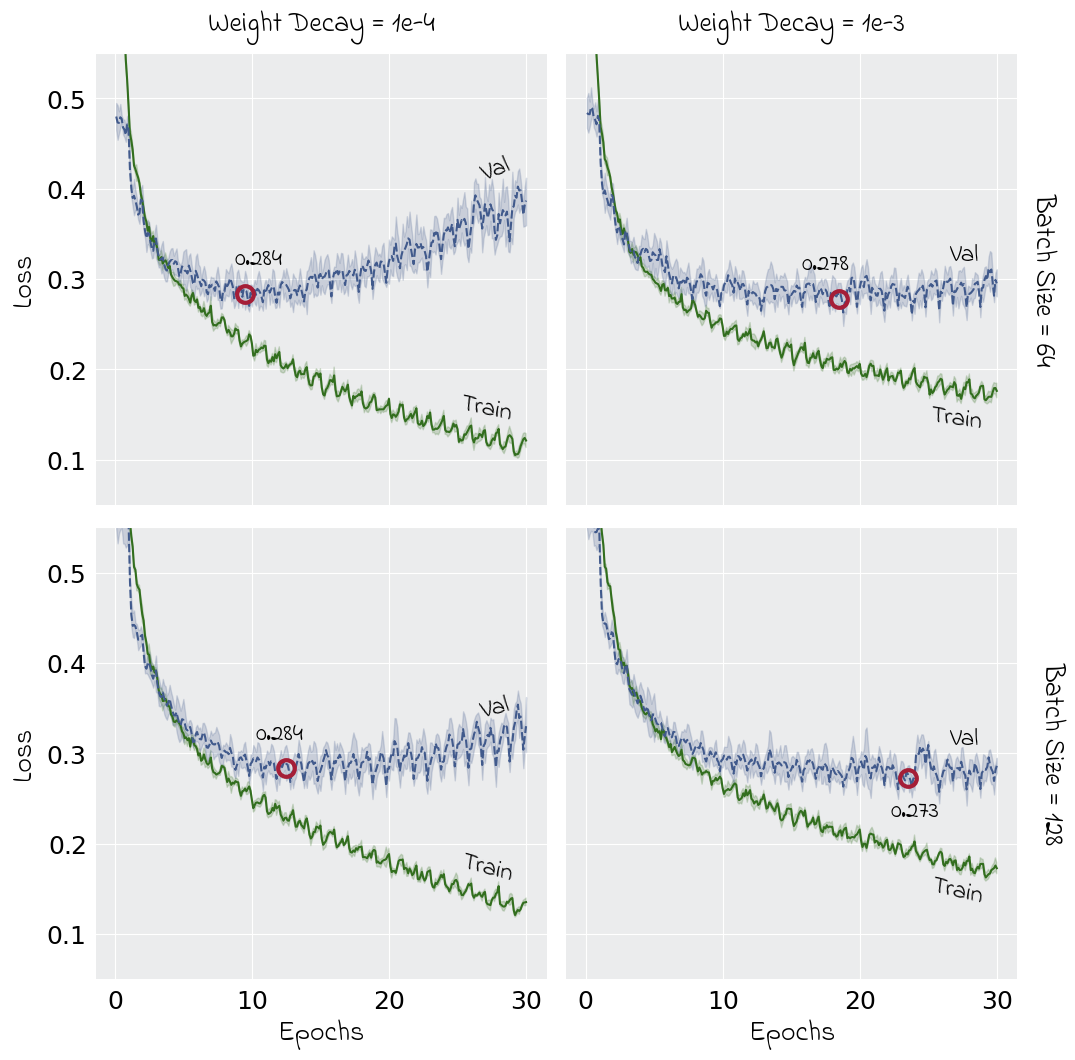

In [10]:
# Preparations to set hue in sns.relplot
palette = {
    "Val": get_color("tory-blue"),
    "Train": get_color("bilbao")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
g = sns.relplot(
    data=overfitting[overfitting["smooth_wt"]==0.6],
    x="step",
    y="value",
    kind="line",
    row="b",
    col="wd",
    hue="mode",
    style="mode",
    palette=palette,
    legend=False
)

# Remove default titles
g.set_titles("")
g.tight_layout()

# Add axis labels
g.set_axis_labels("Epochs", "Loss", font=label_font, size=20)

# Set range of y-axis to display
plt.ylim(0.05, 0.55)

# Add additional axis labels (``batch_size`` & ``weight_decay``)
rows = [0, 0, 0, 1]
cols = [0, 1, 1, 1]
label_args = [
    [0.5, 1.02, "Weight Decay = 1e-4"],
    [0.5, 1.02, "Weight Decay = 1e-3"],
    [1.02, 0.5, "Batch Size = 64"],
    [1.04, 0.5, "Batch Size = 128"]
]
label_kwargs = [
    {"ha": "center", "va": "bottom"},
    {"ha": "center", "va": "bottom"},
    {"ha": "left", "va": "center", "rotation": 270},
    {"ha": "left", "va": "center", "rotation": 270}
]
for i, j, label_args, label_kwargs in zip(rows, cols, label_args, label_kwargs):
    g.axes[i][j].text(*label_args, **label_kwargs, transform=g.axes[i][j].transAxes, font=label_font, size=20)

# For adding line annotations ("Train" and "Val")
label_train = {
    "pos": {(64, 0.0001): (25, 0.135), (64, 0.001): (25, 0.125), (128, 0.0001): (25, 0.15), (128, 0.001): (25, 0.125)},
    "rot": {(64, 0.0001): -12, (64, 0.001): -8, (128, 0.0001): -15, (128, 0.001): -13}
}
label_val = {
    "pos": {(64, 0.0001): (26.5, 0.40), (64, 0.001): (26.5, 0.31), (128, 0.0001): (26.5, 0.33), (128, 0.001): (26.5, 0.30)},
    "rot": {(64, 0.0001): 22, (64, 0.001): 0, (128, 0.0001): 15, (128, 0.001): 0}
}

# For annotating the minimum loss (on the validation set)
text_pos = {
    (64, 0.0001): (10.5, 0.32),
    (64, 0.001): (17.5, 0.315),
    (128, 0.0001): (12, 0.32),
    (128, 0.001): (24, 0.235)
}

# Modify appearance of individual plots
for (b, wd), ax in g.axes_dict.items():
    # Annotate lines ("Train" and "Val")
    ax.text(
        label_train["pos"][(b, wd)][0],
        label_train["pos"][(b, wd)][1],
        "Train",
        ha="left",
        va="bottom",
        rotation=label_train["rot"][(b, wd)],
        font=label_font,
        size=18
    )
    ax.text(
        label_val["pos"][(b, wd)][0],
        label_val["pos"][(b, wd)][1],
        "Val",
        ha="left",
        va="bottom",
        rotation=label_val["rot"][(b, wd)],
        font=label_font,
        size=18
    )
    
    # Highlight minimum loss (on validation set) by red circle
    ax.plot(
        best_epoch_dict[(b, wd)][0] - 0.5,  # places marker at center of epoch
        best_epoch_dict[(b, wd)][1],
        marker="o",
        markeredgecolor=get_color("red"),
        markeredgewidth=3,
        markerfacecolor=get_color("red", alpha=0),
        markersize=12
    )

    # Annotate minimum loss (on validation set)
    ax.text(
        text_pos[(b, wd)][0],
        text_pos[(b, wd)][1],
        round(best_epoch_dict[(b, wd)][1], 3),
        ha="center",
        va="center",
        font=label_font,
        size=18
    )
    
    # Remove spines
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(True)
    ax.spines["top"].set_color("white")

    # Change background color
    ax.set_facecolor(get_color("anthracite", tint=0.9))

    # Add grid
    ax.xaxis.grid(color="white")
    ax.yaxis.grid(color="white")
    ax.set_axisbelow(True)

    # Remove ticks and change size of tick labels
    ax.tick_params(
        bottom=False,
        left=False,
        labelsize=18
    )

    # Set tick labels in math mode
    xticks = [0, 10, 20, 30]
    yticks = [0.1, 0.2, 0.3, 0.4, 0.5]
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"${xtick}$" for xtick in xticks])
    ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_yticklabels([f"${ytick}$" for ytick in yticks])

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

## Grid Search: Momentum x Weight Decay


### Analyze Training Results

In [11]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/grid_search/momentum_wd/2024-09-20_22-02-49"
momentum_wd = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
momentum_wd = momentum_wd.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Display overall results
momentum_wd

,momentum,wd,Epochs,Loss,Acc@1,Acc@5
0,0.70,0.000001,16,0.297,0.893,0.999
1,0.70,0.000010,16,0.295,0.894,0.999
2,0.70,0.000100,16,0.298,0.891,0.998
3,0.70,0.001000,24,0.285,0.898,0.999
4,0.70,0.010000,50,0.332,0.883,0.998
5,0.80,0.000001,12,0.289,0.893,0.999
6,0.80,0.000010,16,0.288,0.896,0.999
7,0.80,0.000100,16,0.287,0.896,0.999
8,0.80,0.001000,16,0.281,0.898,0.998
9,0.80,0.010000,50,0.336,0.879,0.999


In [12]:
# Group results by weight decay
grouped_by_wd = momentum_wd.groupby("wd")
col_order = ["momentum", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by weight decay
for wd, group in grouped_by_wd:
    print(f"\033[1mWEIGHT DECAY: {wd}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

WEIGHT DECAY: 1e-06
 momentum  Acc@1  Loss  Epochs
     0.70  0.893 0.297      16
     0.80  0.893 0.289      12
     0.85  0.896 0.296      16
     0.90  0.895 0.293      10
     0.95  0.889 0.321      10
     0.99  0.821 0.519      11


WEIGHT DECAY: 1e-05
 momentum  Acc@1  Loss  Epochs
     0.70  0.894 0.295      16
     0.80  0.896 0.288      16
     0.85  0.893 0.297      12
     0.90  0.897 0.294      10
     0.95  0.890 0.309      11
     0.99  0.808 0.560      12


WEIGHT DECAY: 0.0001
 momentum  Acc@1  Loss  Epochs
     0.70  0.891 0.298      16
     0.80  0.896 0.287      16
     0.85  0.897 0.297      17
     0.90  0.896 0.292      10
     0.95  0.891 0.312       9
     0.99  0.848 0.429      50


WEIGHT DECAY: 0.001
 momentum  Acc@1  Loss  Epochs
     0.70  0.898 0.285      24
     0.80  0.898 0.281      16
     0.85  0.895 0.284      16
     0.90  0.897 0.286      23
     0.95  0.898 0.286      28
     0.99  0.835 0.474      10


WEIGHT DECAY: 0.01
 momentum  Acc@1  Loss  

In [13]:
# Group results by momentum
grouped_by_momentum = momentum_wd.groupby("momentum")
col_order = ["wd", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by momentum
for momentum, group in grouped_by_momentum:
    print(f"\033[1mMOMENTUM: {momentum}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

MOMENTUM: 0.7
      wd  Acc@1  Loss  Epochs
0.000001  0.893 0.297      16
0.000010  0.894 0.295      16
0.000100  0.891 0.298      16
0.001000  0.898 0.285      24
0.010000  0.883 0.332      50


MOMENTUM: 0.8
      wd  Acc@1  Loss  Epochs
0.000001  0.893 0.289      12
0.000010  0.896 0.288      16
0.000100  0.896 0.287      16
0.001000  0.898 0.281      16
0.010000  0.879 0.336      50


MOMENTUM: 0.85
      wd  Acc@1  Loss  Epochs
0.000001  0.896 0.296      16
0.000010  0.893 0.297      12
0.000100  0.897 0.297      17
0.001000  0.895 0.284      16
0.010000  0.880 0.340      65


MOMENTUM: 0.9
      wd  Acc@1  Loss  Epochs
0.000001  0.895 0.293      10
0.000010  0.897 0.294      10
0.000100  0.896 0.292      10
0.001000  0.897 0.286      23
0.010000  0.875 0.351      32


MOMENTUM: 0.95
      wd  Acc@1  Loss  Epochs
0.000001  0.889 0.321      10
0.000010  0.890 0.309      11
0.000100  0.891 0.312       9
0.001000  0.898 0.286      28
0.010000  0.872 0.365      49


MOMENTUM: 0.99
   

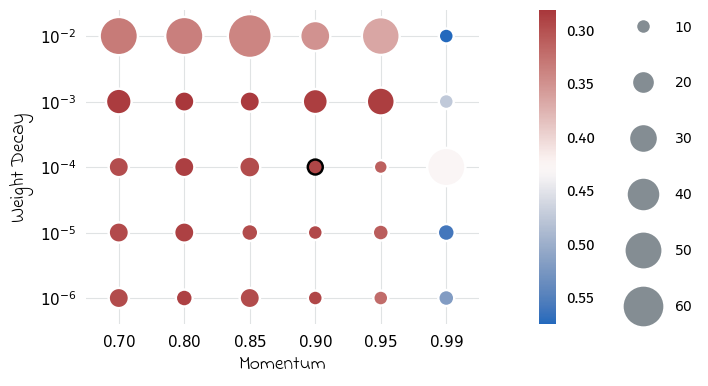

In [14]:
# Convert grid search parameters to strings to achieve equidistant ticks
momentum_wd["momentum"] = momentum_wd["momentum"].astype(str)
momentum_wd["wd"] = momentum_wd["wd"].astype(str)

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
# NOTE: `size_norm=(a, b)` and `sizes=(l, u)` --> markersize: `max(min(x, b) - a, 0) / (b - a) * (u - l) + l`
g = sns.relplot(
    data=momentum_wd,
    x="momentum",
    y="wd",
    hue="Loss",
    size="Epochs",
    size_norm=(momentum_wd["Epochs"].min(), momentum_wd["Epochs"].max()),
    sizes=(100, 1000),
    palette=sns.color_palette("vlag_r", as_cmap=True),
    linewidth=1.75
)

# Invert y-axis (so that weight decay increases from bottom to top)
g.ax.invert_yaxis()

# Add grid
g.ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
g.ax.yaxis.grid(color=get_color("anthracite", tint=0.85))
g.ax.set_axisbelow(True)

# Change edge color of markers (highlight previous run)
marker_edge_color = ["white"] * len(momentum_wd)
marker_edge_color[17] = "black"
g.ax.collections[0].set_edgecolor(marker_edge_color)

# Remove axis labels and spines
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)

# Remove ticks & change size of tick labels
g.ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Manually set tick labels
g.ax.set_xticks([0, 1, 2, 3, 4, 5])
g.ax.set_xticklabels(["$0.70$", "$0.80$", "$0.85$", "$0.90$", "$0.95$", "$0.99$"])
g.ax.set_yticks([0, 1, 2, 3, 4])
g.ax.set_yticklabels(["$10^{-6}$", "$10^{-5}$", "$10^{-4}$", "$10^{-3}$", "$10^{-2}$"])

# Add padding around plot to keep markers at the edge from being cut off
g.ax.margins(.1)

# Store information of default legend for later use in custom legend
handles, labels = g.ax.get_legend_handles_labels()
start_idx = labels.index("Epochs") + 1
legend_dict = {
    label: handle.get_markersize()
    for label, handle in zip(labels[start_idx:], handles[start_idx:])
}

# Remove default legend
g._legend.remove()

# Add color bar illustrating loss values
norm = mpl.colors.Normalize(
    vmin=momentum_wd["Loss"].min(),
    vmax=momentum_wd["Loss"].max()
)
sm = mpl.cm.ScalarMappable(cmap=sns.color_palette("vlag_r", as_cmap=True), norm=norm)
cax = g.fig.add_axes([
    g.ax.get_position().x1 + 0.1,   # left
    g.ax.get_position().y0,         # bottom
    0.03,                           # width
    g.ax.get_position().height      # height
])
cbar = plt.colorbar(sm, cax=cax)
cbar.outline.set_visible(False)
cbar.ax.tick_params(right=False, labelsize=11)
cbar.ax.invert_yaxis()

# Add custom legend illustrating number of epochs
legend_handles = [
    Line2D(
        [0], [0], linestyle="None", marker="o",
        markeredgecolor="white",
        markeredgewidth=1.75,
        markerfacecolor=get_color("anthracite", tint=0.4),
        markersize=v,
        label=f"${k}$"
    )
    for k, v in legend_dict.items()  # uses information from default legend retrieved earlier
]
g.ax.legend(
    handles=legend_handles,
    loc="center right",
    bbox_to_anchor=(1.575, 0.5),
    frameon=False,
    labelspacing=3,
    handletextpad=1.25
)

# Add axis labels
g.ax.set_xlabel("Momentum", font=label_font, size=14)
g.ax.set_ylabel("Weight Decay", font=label_font, size=14)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

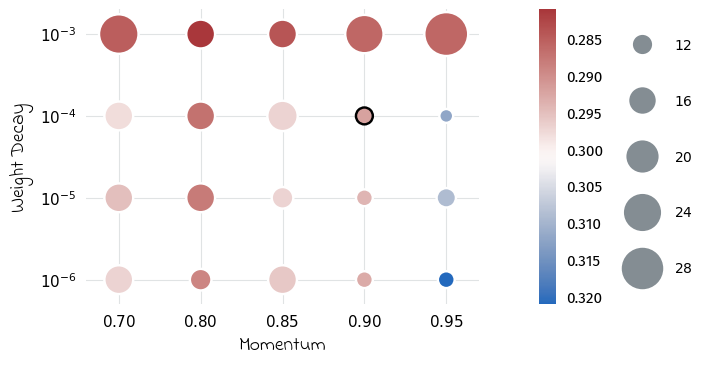

In [15]:
# Exclude parameter combinations that are clearly not performing well
momentum_wd_subset = momentum_wd.copy()
momentum_wd_subset = momentum_wd_subset.query("momentum != '0.99' and wd != '0.01'")

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
# NOTE: ``size_norm=(a, b)`` and ``sizes=(l, u)`` --> markersize: ``max(min(x, b) - a, 0) / (b - a) * (u - l) + l``
g = sns.relplot(
    data=momentum_wd_subset,
    x="momentum",
    y="wd",
    hue="Loss",
    size="Epochs",
    size_norm=(momentum_wd_subset["Epochs"].min(), momentum_wd_subset["Epochs"].max()),
    sizes=(100, 1000),
    palette=sns.color_palette("vlag_r", as_cmap=True),
    linewidth=1.75
)

# Invert y-axis (so that weight decay increases from bottom to top)
g.ax.invert_yaxis()

# Add grid
g.ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
g.ax.yaxis.grid(color=get_color("anthracite", tint=0.85))
g.ax.set_axisbelow(True)

# Change edge color of markers (highlight previous run)
marker_edge_color = ["white"] * len(momentum_wd_subset)
marker_edge_color[14] = "black"
g.ax.collections[0].set_edgecolor(marker_edge_color)

# Remove axis labels and spines
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)

# Remove ticks & change size of tick labels
g.ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Manually set tick labels
g.ax.set_xticks([0, 1, 2, 3, 4])
g.ax.set_xticklabels(["$0.70$", "$0.80$", "$0.85$", "$0.90$", "$0.95$"])
g.ax.set_yticks([0, 1, 2, 3])
g.ax.set_yticklabels(["$10^{-6}$", "$10^{-5}$", "$10^{-4}$", "$10^{-3}$"])

# Add padding around plot to keep markers at the edge from being cut off
g.ax.margins(.1)

# Store information of default legend for later use in custom legend
handles, labels = g.ax.get_legend_handles_labels()
start_idx = labels.index("Epochs") + 1
legend_dict = {
    label: handle.get_markersize()
    for label, handle in zip(labels[start_idx:], handles[start_idx:])
}

# Remove default legend
g._legend.remove()

# Add color bar illustrating loss values
norm = mpl.colors.Normalize(
    vmin=momentum_wd_subset["Loss"].min(),
    vmax=momentum_wd_subset["Loss"].max()
)
sm = mpl.cm.ScalarMappable(cmap=sns.color_palette("vlag_r", as_cmap=True), norm=norm)
cax = g.fig.add_axes([
    g.ax.get_position().x1 + 0.1,   # left
    g.ax.get_position().y0,         # bottom
    0.03,                           # width
    g.ax.get_position().height      # height
])
cbar = plt.colorbar(sm, cax=cax)
cbar.outline.set_visible(False)
cbar.ax.tick_params(right=False, labelsize=11)
cbar.ax.invert_yaxis()

# Add custom legend illustrating number of epochs
legend_handles = [
    Line2D(
        [0], [0], linestyle="None", marker="o",
        markeredgecolor="white",
        markeredgewidth=1.75,
        markerfacecolor=get_color("anthracite", tint=0.4),
        markersize=v,
        label=f"${k}$"
    )
    for k, v in legend_dict.items()  # uses information from default legend retrieved earlier
]
g.ax.legend(
    handles=legend_handles,
    loc="center right",
    bbox_to_anchor=(1.575, 0.5),
    frameon=False,
    labelspacing=3,
    handletextpad=1.25
)

# Add axis labels
g.ax.set_xlabel("Momentum", font=label_font, size=14)
g.ax.set_ylabel("Weight Decay", font=label_font, size=14)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

## Data Augmentation: Horizontal Flipping

In [16]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/data_augmentation/horizontal_flipping/2024-09-21_14-20-38"
hflip = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
hflip = hflip.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Add ID to identify runs with identical hparams (except for flip probability)
hflip["config_id"] = hflip.groupby(["b", "momentum", "wd"]).ngroup() + 1

# Reorder columns and drop "Acc@5"
col_order = hflip.columns.tolist()
col_order = [col_name for col_name in col_order if col_name not in ["config_id", "Acc@5"]]
col_order = ["config_id", *col_order]
hflip = hflip[col_order]

# Sort and display results
hflip = hflip.sort_values(by=["config_id", "flip_p"])
hflip

,config_id,b,flip_p,momentum,wd,Epochs,Loss,Acc@1
0,1,64,0.0,0.80,0.0001,16,0.287,0.896
4,1,64,0.5,0.80,0.0001,30,0.290,0.902
1,2,64,0.0,0.80,0.0010,16,0.281,0.898
5,2,64,0.5,0.80,0.0010,48,0.270,0.903
2,3,64,0.0,0.85,0.0001,17,0.297,0.897
6,3,64,0.5,0.85,0.0001,14,0.288,0.894
3,4,64,0.0,0.85,0.0010,16,0.284,0.895
7,4,64,0.5,0.85,0.0010,30,0.268,0.901
8,5,128,0.0,0.80,0.0001,24,0.297,0.894
12,5,128,0.5,0.80,0.0001,38,0.292,0.897


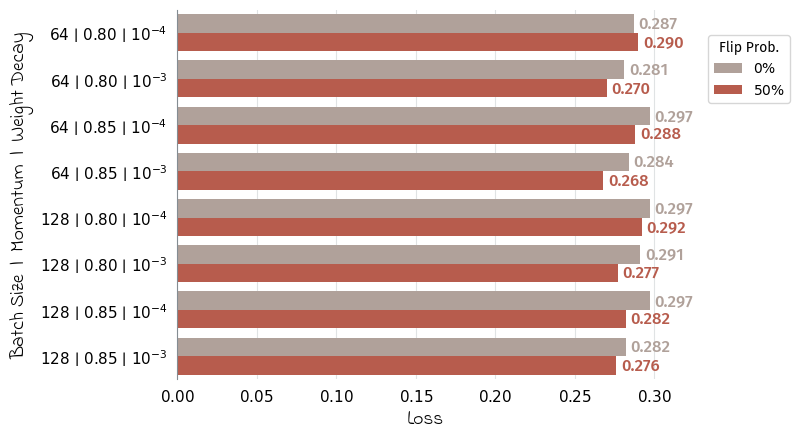

In [17]:
# Preparations to set hue in sns.barplot
palette = {
    0.0: get_color("thatch"),
    0.5: get_color("grenadier")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.barplot(
    hflip,
    x="Loss",
    y="config_id",
    orient="y",
    hue="flip_p",
    palette=palette
)

# Add grid
ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove top, right, and bottom spines (figure borders)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Change color of left spine
ax.spines["left"].set_color(get_color("anthracite", tint=0.4))

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Preparations to set custom y-tick labels
wd_mapping = {
    0.0001: "$10^{-4}$",
    0.001: "$10^{-3}$"
}
config_dict = {}
unique_config_ids = hflip["config_id"].unique()
for unique_id in unique_config_ids:
    data = hflip[hflip["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$ | {wd_mapping[data['wd']]}"

# Set tick labels
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ax.set_xticks(xticks)
ax.set_xticklabels([f"${xtick:.2f}$" for xtick in xticks])
ax.set_yticks(ax.get_yticks())  # only to suppress warning
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Add axis labels
ax.set_xlabel("Loss", font=label_font, size=14)
ax.set_ylabel("Batch Size  |  Momentum  |  Weight Decay", font=label_font, size=14)

# Modify legend
custom_labels = {"0.0": "$0\%$", "0.5": "$50\%$"}
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    [custom_labels[l] for l in labels],
    title="Flip Prob.",
    bbox_to_anchor=(1.25, 0.95),
    loc="upper right"
)

# Add text annotations next to bars
for bar in ax.patches:
    if bar.get_width() > 0:
        ax.text(
            bar.get_width() + 0.003,
            bar.get_y() + bar.get_height() / 2,
            f"{round(bar.get_width(), 3):.3f}",
            ha="left",
            va="center",
            color=bar.get_facecolor(),
            weight="roman",
            size=12
        )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

To understand why the improvement in performance is not as dramatic as one might have hoped, we visualize the effect of horizontally  
flipping images of the FashionMNIST dataset.

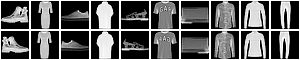

In [18]:
# Load one sample per class, add padding around each image, then flip all images
samples = load_class_samples(
    "../data/processed/FashionMNIST",
    num_samples_per_class=1
)
samples = np.array([
    Pad(padding=1, fill=255)(Image.fromarray(sample)) for sample in samples
])
flipped_samples = np.flip(samples, 2)

# Combine original and flipped samples into sprite
all_samples = np.concatenate((samples, flipped_samples))
flip_sprite = Image.fromarray(create_sprite(all_samples, 2, 10))
display(flip_sprite)

## Data Augmentation: Random Cropping


### Visualize Cropping

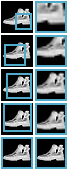

In [19]:
# Select a single image
img = Image.fromarray(load_class_samples(
    "../data/processed/FashionMNIST",
    num_samples_per_class=1
)[0])

# Visualize crops for 5 different ``crop_scale`` values
annotated_imgs = []
cropped_imgs = []
crop_scales = [0.2, 0.4, 0.6, 0.8, 1.0]
frame_color = tuple((get_color("viking") * 255).astype(int))

for crop_scale in crop_scales:
    annotated_img, cropped_img = visualize_crop(
        img=img,
        crop_scale=crop_scale,
        crop_ratio=1,
        frame_color=frame_color,
        frame_width=2
    )
    annotated_imgs.append(annotated_img)
    cropped_imgs.append(cropped_img)

all_imgs = annotated_imgs + cropped_imgs
all_imgs_np = np.array([Pad(padding=1, fill=255)(img) for img in all_imgs])

crop_sprite = Image.fromarray(create_sprite(all_imgs_np, len(crop_scales), 2, by_row=False))
display(crop_sprite)

### Analyze Training Results

In [20]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/data_augmentation/random_cropping/2024-09-21_14-21-07"
random_crops = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Modify columns
random_crops = random_crops.drop(columns=["Accuracy@5"])
random_crops = random_crops.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from horizontal flipping experiment w/ matching parameters (--> baseline w/o random cropping)
previous_results = hflip.query("wd == 0.001 and flip_p == 0.5")
previous_results = previous_results.drop(columns=["config_id", "flip_p", "wd"])
previous_results["crop_scale.lower"] = 1.0
random_crops = pd.concat([random_crops, previous_results], axis=0)
random_crops = random_crops.sort_values(by=["b", "momentum", "crop_scale.lower"]).reset_index(drop=True)

# Add ID to identify runs with identical hparams (except for crop_scale.lower)
random_crops["config_id"] = random_crops.groupby(["b", "momentum"]).ngroup() + 1

# Reorder columns
col_order = random_crops.columns.tolist()
col_order = [col_name for col_name in col_order if col_name != "config_id"]
col_order = ["config_id", *col_order]
random_crops = random_crops[col_order]

# Sort and display results
random_crops = random_crops.sort_values(by=["config_id", "crop_scale.lower"])
random_crops

,config_id,b,crop_scale.lower,momentum,Epochs,Loss,Acc@1
0,1,64,0.6,0.80,93,0.270,0.898
1,1,64,0.7,0.80,50,0.274,0.899
2,1,64,0.8,0.80,63,0.267,0.901
3,1,64,0.9,0.80,63,0.260,0.904
4,1,64,1.0,0.80,48,0.270,0.903
5,2,64,0.6,0.85,93,0.267,0.898
6,2,64,0.7,0.85,83,0.268,0.899
7,2,64,0.8,0.85,80,0.262,0.902
8,2,64,0.9,0.85,101,0.258,0.907
9,2,64,1.0,0.85,30,0.268,0.901


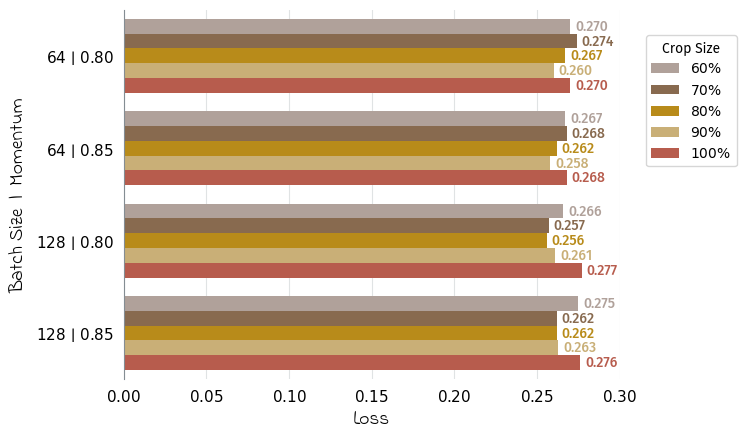

In [21]:
# Preparations to set hue in sns.barplot
palette = {
    0.6: get_color("thatch"),
    0.7: get_color("dark-wood"),
    0.8: get_color("tangerine"),
    0.9: get_color("tacha"),
    1.0: get_color("grenadier")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.barplot(
    random_crops,
    x="Loss",
    y="config_id",
    orient="y",
    hue="crop_scale.lower",
    palette=palette
)

# Add grid
ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove top, right, and bottom spines (figure borders)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Change color of left spine
ax.spines["left"].set_color(get_color("anthracite", tint=0.4))

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Preparations to set custom y-tick labels
config_dict = {}
unique_config_ids = random_crops["config_id"].unique()
for unique_id in unique_config_ids:
    data = random_crops[random_crops["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$"

# Set tick labels
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ax.set_xticks(xticks)
ax.set_xticklabels([f"${xtick:.2f}$" for xtick in xticks])
ax.set_yticks(ax.get_yticks())  # only to suppress warning
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Add axis labels
ax.set_xlabel("Loss", font=label_font, size=14)
ax.set_ylabel("Batch Size  |  Momentum", font=label_font, size=14)

# Modify legend
custom_labels = {
    "0.6": "$60\%$",
    "0.7": "$70\%$",
    "0.8": "$80\%$",
    "0.9": "$90\%$",
    "1.0": "$100\%$"
}
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    [custom_labels[l] for l in labels],
    title="Crop Size",
    bbox_to_anchor=(1.25, 0.95),
    loc="upper right"
)

# Add text annotations next to bars
for bar in ax.patches:
    if bar.get_width() > 0:
        ax.text(
            bar.get_width() + 0.003,
            bar.get_y() + bar.get_height() / 2,
            f"{round(bar.get_width(), 3):.3f}",
            ha="left",
            va="center",
            color=bar.get_facecolor(),
            weight="roman",
            size=10
        )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

## Grid Search: LR Schedule


### Analyze Training Results (Loss)

In [22]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/grid_search/lr_schedule/2024-09-22_21-43-21"
lr_schedule = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
lr_schedule = lr_schedule.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Display overall results
lr_schedule

,gamma,step_size,Epochs,Loss,Acc@1,Acc@5
0,0.1,10,27,0.304,0.889,0.999
1,0.1,20,55,0.268,0.900,0.999
2,0.1,30,55,0.255,0.906,0.999
3,0.1,40,55,0.252,0.908,0.999
4,0.1,50,108,0.246,0.911,0.999
5,0.5,10,79,0.264,0.902,0.999
6,0.5,20,125,0.249,0.910,0.999
7,0.5,30,113,0.247,0.910,0.999
8,0.5,40,104,0.250,0.910,0.999
9,0.5,50,79,0.259,0.904,1.000


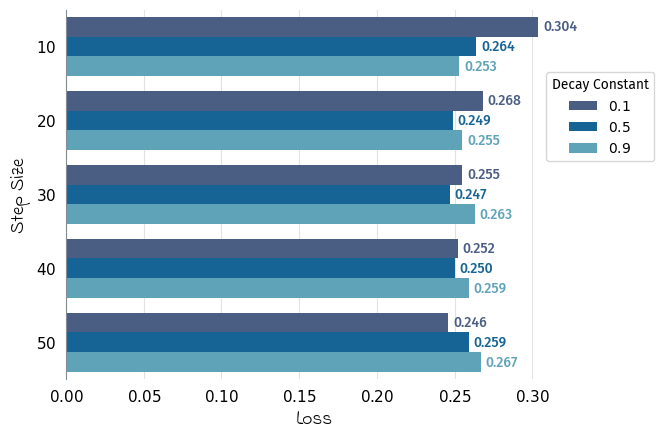

In [23]:
# Preparations to set hue in sns.barplot
palette = {
    0.1: get_color("tory-blue"),
    0.5: get_color("cerulean"),
    0.9: get_color("viking")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.barplot(
    lr_schedule,
    x="Loss",
    y="step_size",
    orient="y",
    hue="gamma",
    palette=palette
)

# Add grid
ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove top, right, and bottom spines (figure borders)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Change color of left spine
ax.spines["left"].set_color(get_color("anthracite", tint=0.4))

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Set tick labels
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ax.set_xticks(xticks)
ax.set_xticklabels([f"${xtick:.2f}$" for xtick in xticks])
ax.set_yticks(ax.get_yticks())  # only to suppress warning
ax.set_yticklabels(f"${int(ylabel.get_text())}$" for ylabel in ax.get_yticklabels())

# Add axis labels
ax.set_xlabel("Loss", font=label_font, size=14)
ax.set_ylabel("Step Size", font=label_font, size=14)

# Modify legend
custom_labels = {
    "0.1": "$0.1$",
    "0.5": "$0.5$",
    "0.9": "$0.9$"
}
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    [custom_labels[l] for l in labels],
    title="Decay Constant",
    bbox_to_anchor=(1.2, 0.85),
    loc="upper right"
)

# Add text annotations next to bars
for bar in ax.patches:
    if bar.get_width() > 0:
        ax.text(
            bar.get_width() + 0.003,
            bar.get_y() + bar.get_height() / 2,
            f"{round(bar.get_width(), 3):.3f}",
            ha="left",
            va="center",
            color=bar.get_facecolor(),
            weight="roman",
            size=10
        )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

### Analyze Training Results (# Epochs)

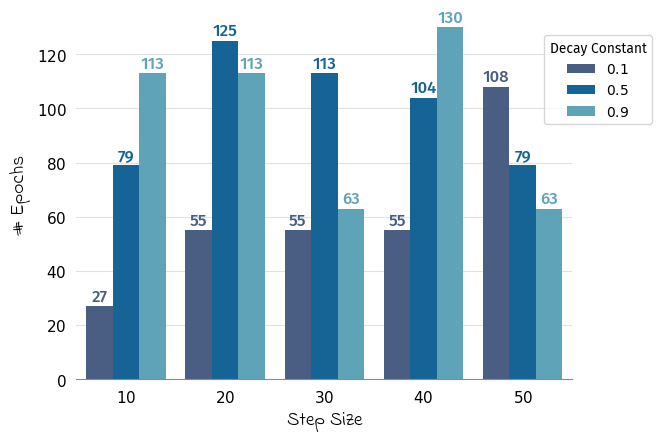

In [24]:
# Preparations to set hue in sns.barplot
palette = {
    0.1: get_color("tory-blue"),
    0.5: get_color("cerulean"),
    0.9: get_color("viking")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.barplot(
    lr_schedule,
    x="step_size",
    y="Epochs",
    hue="gamma",
    palette=palette
)

# Add grid
ax.yaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove left, top, and right spines (figure borders)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Change color of bottom spine
ax.spines["bottom"].set_color(get_color("anthracite", tint=0.4))

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Set tick labels
ax.set_xticks(ax.get_xticks())  # only to suppress warning
ax.set_xticklabels(f"${int(xlabel.get_text())}$" for xlabel in ax.get_xticklabels())
yticks = [0, 20, 40, 60, 80, 100, 120]
ax.set_yticks(yticks)
ax.set_yticklabels(f"${int(ylabel.get_text())}$" for ylabel in ax.get_yticklabels())

# Add axis labels
ax.set_xlabel("Step Size", font=label_font, size=14)
ax.set_ylabel("# Epochs", font=label_font, size=14)

# Modify legend
custom_labels = {
    "0.1": "$0.1$",
    "0.5": "$0.5$",
    "0.9": "$0.9$"
}
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    [custom_labels[l] for l in labels],
    title="Decay Constant",
    bbox_to_anchor=(1.175, 0.95),
    loc="upper right"
)

# Add text annotations to top of bars
for bar in ax.patches:
    if bar.get_width() > 0:
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.75,
          f"{bar.get_height():.0f}",
          ha="center",
          va="bottom",
          color=bar.get_facecolor(),
          weight="roman",
          size=12
      )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

## Control: Random Cropping


### Crop Scale (Lower Bound)


#### Analyze Training Results

In [25]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/data_augmentation/random_cropping_control/scale/2024-09-25_12-26-34"
control_scale = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Modify columns
control_scale = control_scale.drop(columns=["Accuracy@5"])
control_scale = control_scale.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from initial random cropping experiment for comparison
previous_results = random_crops[random_crops["crop_scale.lower"].isin([0.6, 0.8, 1.0])]
previous_results = previous_results.drop(columns=["config_id"])
control_scale = pd.concat([control_scale, previous_results], axis=0)
control_scale = control_scale.sort_values(by=["b", "momentum", "crop_scale.lower"]).reset_index(drop=True)

# Add ID to identify runs with identical hparams (except for crop_scale.lower)
control_scale["config_id"] = control_scale.groupby(["b", "momentum"]).ngroup() + 1

# Sort and display results
control_scale = control_scale.sort_values(by=["config_id", "crop_scale.lower"])
control_scale

,b,crop_scale.lower,momentum,Epochs,Loss,Acc@1,config_id
0,64,0.2,0.80,104,0.300,0.888,1
1,64,0.4,0.80,107,0.287,0.892,1
2,64,0.6,0.80,93,0.270,0.898,1
3,64,0.8,0.80,63,0.267,0.901,1
4,64,1.0,0.80,48,0.270,0.903,1
5,64,0.2,0.85,59,0.323,0.883,2
6,64,0.4,0.85,113,0.286,0.895,2
7,64,0.6,0.85,93,0.267,0.898,2
8,64,0.8,0.85,80,0.262,0.902,2
9,64,1.0,0.85,30,0.268,0.901,2


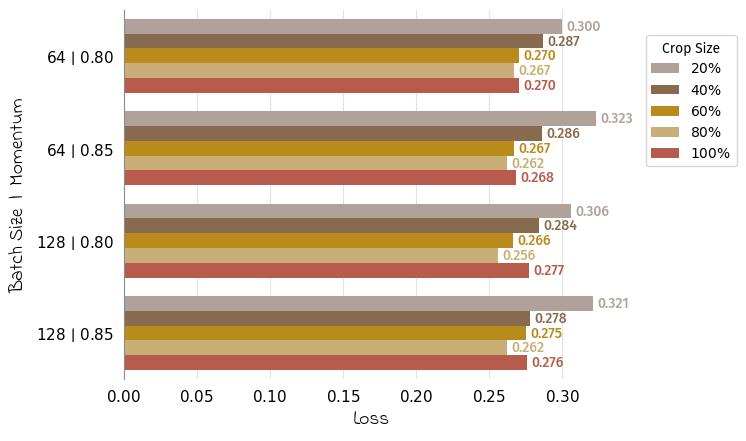

In [26]:
# Preparations to set hue in sns.barplot
palette = {
    0.2: get_color("thatch"),
    0.4: get_color("dark-wood"),
    0.6: get_color("tangerine"),
    0.8: get_color("tacha"),
    1.0: get_color("grenadier")
}

# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.barplot(
    control_scale,
    x="Loss",
    y="config_id",
    orient="y",
    hue="crop_scale.lower",
    palette=palette
)

# Add grid
ax.xaxis.grid(color=get_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove top, right, and bottom spines (figure borders)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Change color of left spine
ax.spines["left"].set_color(get_color("anthracite", tint=0.4))

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Preparations to set custom y-tick labels
config_dict = {}
unique_config_ids = control_scale["config_id"].unique()
for unique_id in unique_config_ids:
    data = control_scale[control_scale["config_id"] == unique_id].iloc[0]
    config_dict[unique_id] = f"${data['b'].astype(int)}$ | ${data['momentum']:.2f}$"

# Set tick labels
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ax.set_xticks(xticks)
ax.set_xticklabels([f"${xtick:.2f}$" for xtick in xticks])
ax.set_yticks(ax.get_yticks())  # only to suppress warning
ax.set_yticklabels(config_dict[int(ylabel.get_text())] for ylabel in ax.get_yticklabels())

# Add axis labels
ax.set_xlabel("Loss", font=label_font, size=14)
ax.set_ylabel("Batch Size  |  Momentum", font=label_font, size=14)

# Modify legend
custom_labels = {
    "0.2": "$20\%$",
    "0.4": "$40\%$",
    "0.6": "$60\%$",
    "0.8": "$80\%$",
    "1.0": "$100\%$"
}
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    [custom_labels[l] for l in labels],
    title="Crop Size",
    bbox_to_anchor=(1.25, 0.95),
    loc="upper right"
)

# Add text annotations next to bars
for bar in ax.patches:
    if bar.get_width() > 0:
        ax.text(
            bar.get_width() + 0.003,
            bar.get_y() + bar.get_height() / 2,
            f"{round(bar.get_width(), 3):.3f}",
            ha="left",
            va="center",
            color=bar.get_facecolor(),
            weight="roman",
            size=10
        )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

In [27]:
# Save figure
fig_control_scale = ax.get_figure()
dir_name = Path("../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control")
save_figure(fig_control_scale, dir_name / "scale.png")

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/scale.png.


### Crop Ratio


#### Analyze Training Results

In [28]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/data_augmentation/random_cropping_control/ratio/2024-09-26_10-31-45"
control_ratio = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Modify columns
control_ratio = control_ratio.drop(columns=["Accuracy@5"])
control_ratio = control_ratio.rename(columns={"Accuracy@1": "Acc@1"})

# Add results from initial random cropping experiment (crop_ratio = (1.0, 1.0)) for comparison
previous_results = random_crops[random_crops["crop_scale.lower"].isin([0.7, 0.8, 0.9, 1.0])]
previous_results = previous_results.drop(columns=["config_id"])
previous_results["crop_ratio.lower"] = 1.0
control_ratio = pd.concat([control_ratio, previous_results], axis=0)

# Round ``crop_ratio.lower`` to 2 decimals
control_ratio["crop_ratio.lower"] = control_ratio["crop_ratio.lower"].round(2)

# Sort and display results
control_ratio = control_ratio.sort_values(by=["crop_ratio.lower", "crop_scale.lower", "b", "momentum"]).reset_index(drop=True)
control_ratio

,b,crop_ratio.lower,crop_scale.lower,momentum,Epochs,Loss,Acc@1
0,64,0.67,0.7,0.80,108,0.276,0.896
1,64,0.67,0.7,0.85,98,0.278,0.895
2,128,0.67,0.7,0.80,73,0.283,0.893
3,128,0.67,0.7,0.85,73,0.275,0.896
4,64,0.67,0.8,0.80,47,0.275,0.897
...,...,...,...,...,...,...,...
59,128,1.00,0.9,0.85,67,0.263,0.904
60,64,1.00,1.0,0.80,48,0.270,0.903
61,64,1.00,1.0,0.85,30,0.268,0.901
62,128,1.00,1.0,0.80,51,0.277,0.904


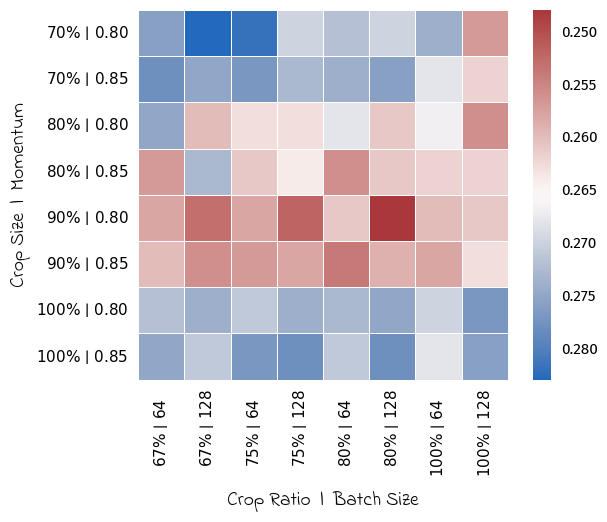

In [29]:
# Change font
plt.rcParams.update({
    "font.family": "Fira Sans"
})

# Plot data
ax = sns.heatmap(
    control_ratio.pivot_table(
        values=["Loss"],
        index=["crop_scale.lower", "momentum"],
        columns=["crop_ratio.lower", "b"]
    ),
    cmap="vlag_r",
    linewidth=.5,
    square=True
)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Set custom tick labels
custom_xticklabels = []
for xlabel in ax.get_xticklabels():
    data = xlabel.get_text().split("-")
    crop_ratio = int(float(data[1]) * 100)
    batch_size = int(data[2])
    entry = f"${crop_ratio}\%$ | ${batch_size}$"
    # Add trailing whitespace to align pipe operator
    if batch_size == 64:
        entry += "   "
    custom_xticklabels.append(entry)

custom_yticklabels = []
for ylabel in ax.get_yticklabels():
    data = ylabel.get_text().split("-")
    crop_size = int(float(data[0]) * 100)
    momentum = float(data[1])
    entry = f"${crop_size}\%$ | ${momentum:.2f}$"
    custom_yticklabels.append(entry)

ax.set_xticklabels(custom_xticklabels)
ax.set_yticklabels(custom_yticklabels)

# Remove colorbar's ticks & invert bar vertically
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(
    right=False,
    labelsize=11
)
cbar.ax.invert_yaxis()

# Add axis labels
ax.set_xlabel("Crop Ratio  |  Batch Size", font=label_font, size=14, labelpad=10)
ax.set_ylabel("Crop Size  |  Momentum", font=label_font, size=14)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

In [30]:
# Save figure
fig_control_ratio = ax.get_figure()
dir_name = Path("../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control")
save_figure(fig_control_ratio, dir_name / "ratio.png")

Figure saved successfully as ../reports/figures/lenet_fashionmnist/data_augmentation/random_cropping_control/ratio.png.
